<a href="https://www.kaggle.com/code/yasinsoylu123/arabic-letters?scriptVersionId=116446788" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display
import random
import math
import tensorflow as tf
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import backend, models
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.applications import VGG16, MobileNet
from keras.applications.vgg16 import preprocess_input

In [2]:
arabic_characters = ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
                    'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain',
                    'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']

In [3]:
x_train = pd.read_csv("/kaggle/input/ahcd1/csvTrainImages 13440x1024.csv",header=None).to_numpy()
y_train = pd.read_csv("/kaggle/input/ahcd1/csvTrainLabel 13440x1.csv",header=None).to_numpy()-1 

x_test = pd.read_csv("/kaggle/input/ahcd1/csvTestImages 3360x1024.csv",header=None).to_numpy()
y_test = pd.read_csv("/kaggle/input/ahcd1/csvTestLabel 3360x1.csv",header=None).to_numpy()-1

print("x_train.shape =", x_train.shape, "\ny_train.shape =", y_train.shape, "\nx_test.shape =", x_test.shape, "\ny_test.shape =", y_test.shape)

x_train.shape = (13440, 1024) 
y_train.shape = (13440, 1) 
x_test.shape = (3360, 1024) 
y_test.shape = (3360, 1)


In [4]:
shape=(32,32,1)

(13440, 32, 32, 1) (3360, 32, 32, 1)


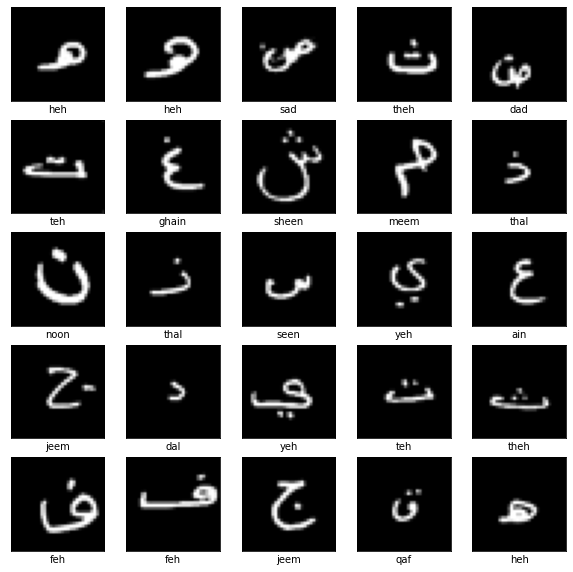

In [5]:
x_train = x_train.reshape(-1,32,32,1)
x_test = x_test.reshape(-1,32,32,1)

x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape, x_test.shape)

ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32).T,"gray")
    plt.xlabel(arabic_characters[int(y_train[ra[i]][0])])
plt.show()

In [6]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape, y_test.shape)
for i in zip(y_train[0], arabic_characters):
    print(i)

(13440, 28) (3360, 28)
(1.0, 'alef')
(0.0, 'beh')
(0.0, 'teh')
(0.0, 'theh')
(0.0, 'jeem')
(0.0, 'hah')
(0.0, 'khah')
(0.0, 'dal')
(0.0, 'thal')
(0.0, 'reh')
(0.0, 'zain')
(0.0, 'seen')
(0.0, 'sheen')
(0.0, 'sad')
(0.0, 'dad')
(0.0, 'tah')
(0.0, 'zah')
(0.0, 'ain')
(0.0, 'ghain')
(0.0, 'feh')
(0.0, 'qaf')
(0.0, 'kaf')
(0.0, 'lam')
(0.0, 'meem')
(0.0, 'noon')
(0.0, 'heh')
(0.0, 'waw')
(0.0, 'yeh')


In [7]:
len(y_test)

3360

In [8]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=shape)) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization()) 

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35)) #64 --> 42

model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(512)) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(28)) 
model.add(Activation('softmax'))

model.summary()

2023-01-15 20:34:03.391419: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 20:34:03.399707: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 20:34:03.400448: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 20:34:03.402485: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        2

2023-01-15 20:34:03.402811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 20:34:03.403544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 20:34:03.404224: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 20:34:04.043115: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 20:34:04.043916: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [9]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [10]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=10,  
        zoom_range = 0.2,
        width_shift_range=0.2, 
        height_shift_range=0.2, 
        horizontal_flip=False,  
        vertical_flip=False) 
train_gen = datagen.flow(x_train, y_train, batch_size=32)
test_gen = datagen.flow(x_test, y_test, batch_size=32)

In [13]:
checkpoint = ModelCheckpoint("cnn.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [18]:
history = model.fit_generator(train_gen, epochs = 100, validation_data = test_gen, 
                            callbacks=[checkpoint,reduce_lr])

Epoch 1/100
420/420 [==============================] - 6s 15ms/step - loss: 0.1931 - accuracy: 0.9397 - val_loss: 0.1371 - val_accuracy: 0.9610

Epoch 00001: val_accuracy did not improve from 0.96458
Epoch 2/100
420/420 [==============================] - 6s 15ms/step - loss: 0.1926 - accuracy: 0.9392 - val_loss: 0.1398 - val_accuracy: 0.9613

Epoch 00002: val_accuracy did not improve from 0.96458
Epoch 3/100
420/420 [==============================] - 7s 16ms/step - loss: 0.1825 - accuracy: 0.9407 - val_loss: 0.1290 - val_accuracy: 0.9595

Epoch 00003: val_accuracy did not improve from 0.96458

Epoch 00003: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
Epoch 4/100
420/420 [==============================] - 7s 16ms/step - loss: 0.1778 - accuracy: 0.9445 - val_loss: 0.1068 - val_accuracy: 0.9696

Epoch 00004: val_accuracy improved from 0.96458 to 0.96964, saving model to cnn.h5
Epoch 5/100
420/420 [==============================] - 6s 15ms/step - loss: 0.1633 - accura

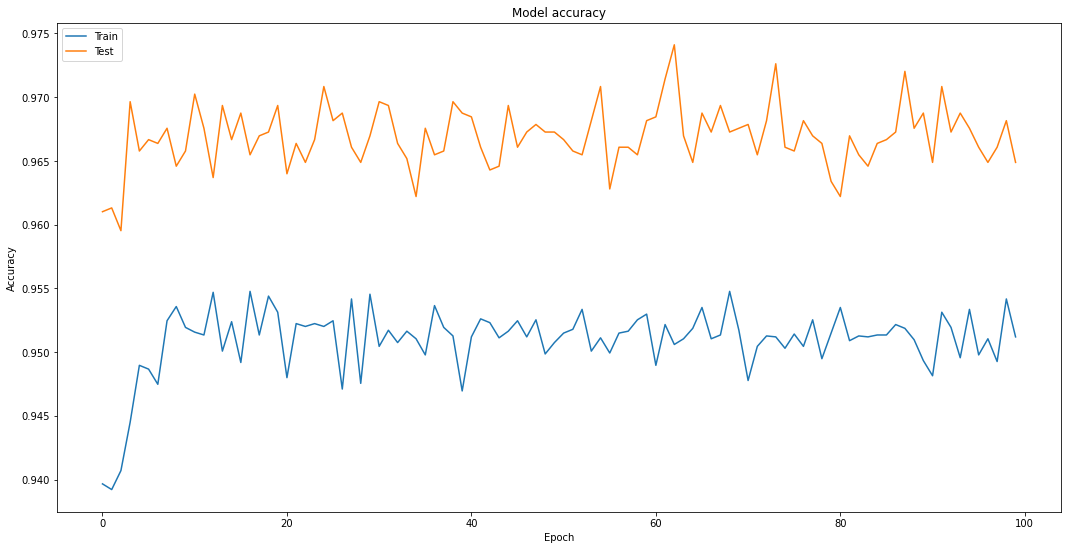

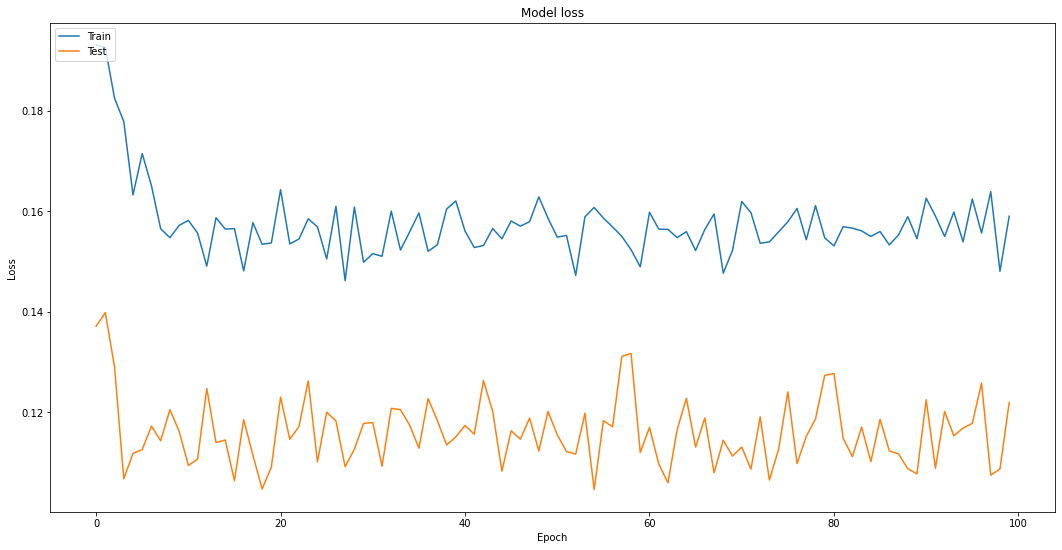

In [19]:
fig = plt.figure(figsize=(18, 9))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

fig = plt.figure(figsize=(18, 9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
score = model.evaluate(x_test, y_test)
print('Test accuarcy: %0.2f%%' % (score[0] * 100))

105/105 [==============================] - 1s 3ms/step - loss: 0.0755 - accuracy: 0.9827
Test accuarcy: 7.55%


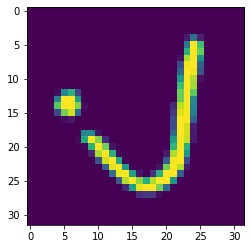

In [21]:
plt.imshow(x_test[20])
plt.show()

In [22]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       120
           1       1.00      0.99      1.00       120
           2       0.96      0.98      0.97       120
           3       1.00      0.99      1.00       120
           4       0.99      1.00      1.00       120
           5       0.98      0.99      0.99       120
           6       1.00      0.99      1.00       120
           7       0.97      0.96      0.97       120
           8       0.97      0.95      0.96       120
           9       0.95      0.97      0.96       120
          10       0.97      0.93      0.95       120
          11       1.00      0.99      1.00       120
          12       0.99      1.00      1.00       120
          13       0.97      1.00      0.98       120
          14       1.00      0.97      0.98       120
          15       0.96      0.99      0.98       120
          16       1.00      0.96      0.98       120
          17       0.99    

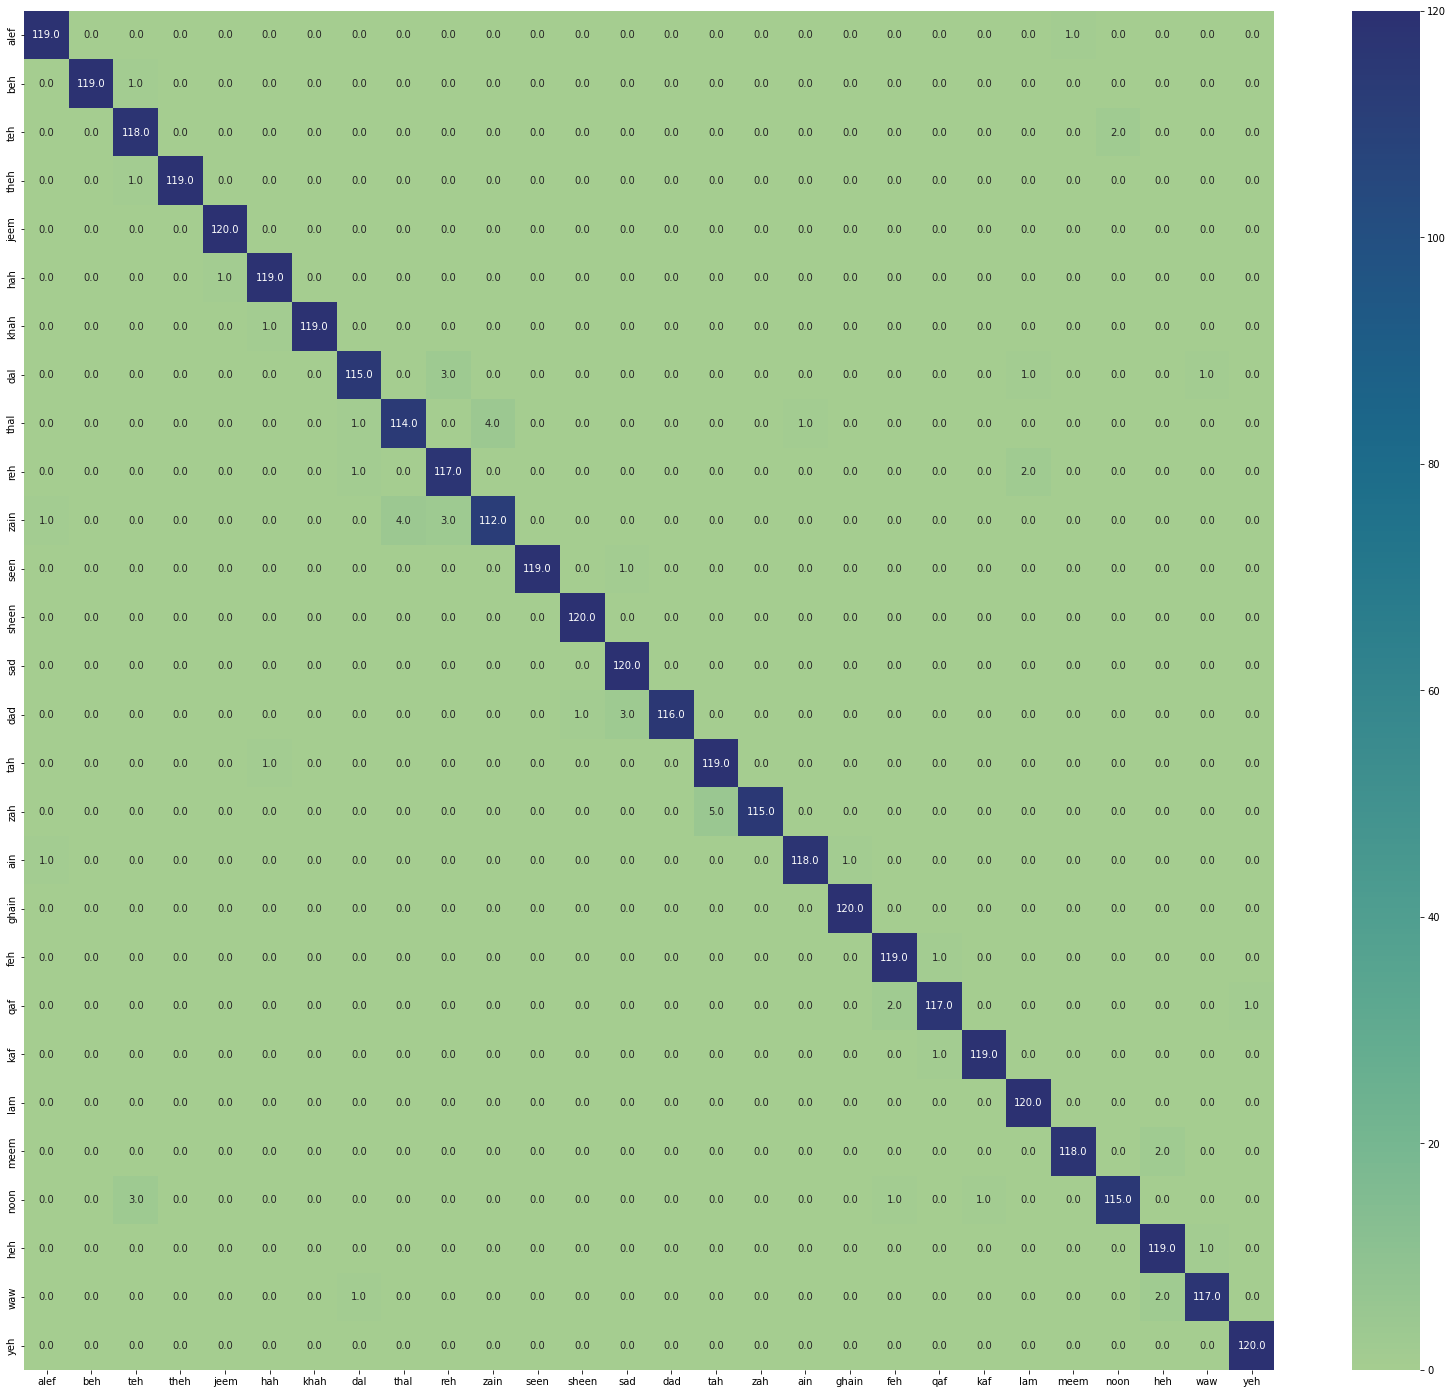

In [27]:
from sklearn.metrics import confusion_matrix

fig,ax=plt.subplots(1,1,figsize=(28,25))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=arabic_characters,yticklabels=arabic_characters,annot=True,fmt=".1f",cmap="crest")


plt.show()